In [28]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hrithick\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
#Load and Read data

df=pd.read_csv('Reviews.csv')

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df['Text'][1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [9]:
#Initial Shape of df

df.shape

(568454, 10)

In [11]:
#Downsampling df

df=df.head(500)

In [13]:
df.shape

(500, 10)

In [15]:
#Checking Duplicate rows

df[df.duplicated()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


## Quick EDA

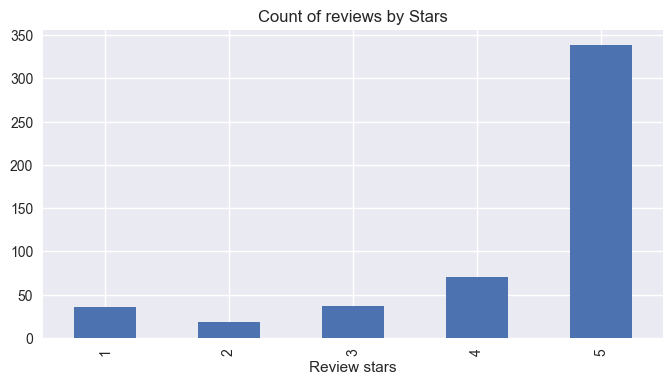

In [20]:
#Count of reviews by Stars

ax=df['Score'].value_counts().sort_index() \
.plot(kind='bar',title='Count of reviews by Stars',figsize=(8,4))

ax.set_xlabel('Review stars')
plt.show()

### We note from above graph that Most of the reviews are Positive with 5 star rating.

## Basic NLTK

In [24]:
#Taking an example review

example=df['Text'][69]
example

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [30]:
#Tokenizing the review

tokens=nltk.word_tokenize(example)
tokens[:10]

['this', 'was', 'sooooo', 'deliscious', 'but', 'too', 'bad', 'i', 'ate', 'em']

In [32]:

nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hrithick\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [34]:
#Assigning Part of speech for each token

tagged=nltk.pos_tag(tokens)
tagged[:10]

[('this', 'DT'),
 ('was', 'VBD'),
 ('sooooo', 'JJ'),
 ('deliscious', 'JJ'),
 ('but', 'CC'),
 ('too', 'RB'),
 ('bad', 'JJ'),
 ('i', 'JJ'),
 ('ate', 'NN'),
 ('em', 'NN')]

In [40]:
nltk.download('maxent_ne_chunker')
nltk.download('words')  # This is also needed for the chunker to work correctly

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Hrithick\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Hrithick\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [42]:
#Grouping of Tagged tokens into their POS

entities=nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  this/DT
  was/VBD
  sooooo/JJ
  deliscious/JJ
  but/CC
  too/RB
  bad/JJ
  i/JJ
  ate/NN
  em/NN
  too/RB
  fast/RB
  and/CC
  gained/VBD
  2/CD
  pds/NN
  !/.
  my/PRP$
  fault/NN)


# VADER Sentiment Scoring

In [45]:

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hrithick\AppData\Roaming\nltk_data...


True

In [47]:
#Importing SentimentIntensityAnalyzer and assigning object to it

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

In [49]:
#Tring some examples

#sia.polarity_scores('i am the most happy person in the world')
sia.polarity_scores('i am the most saddest person in the world')

{'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compound': -0.6478}

In [51]:
sia.polarity_scores(example)

{'neg': 0.344, 'neu': 0.52, 'pos': 0.136, 'compound': -0.7345}

In [53]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [55]:
#Assigning Polarity scores for each review from dataframe

res={}
for i, row in df.iterrows():
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)
    
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [57]:
#Putting vaders results on a dataframe

vaders=pd.DataFrame(res).T
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [59]:
# Merging vaders results with original dataframe

vaders=vaders.reset_index().rename(columns={'index':'Id'})

vaders=vaders.merge(df,how='left')

In [61]:
#Now we have Sentiment scores for each review

vaders[['Id','neg','neu','pos','compound','Score','Summary','Text']].head(10)

,Id,neg,neu,pos,compound,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,0.000,0.520,0.480,0.9487,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,0.000,0.851,0.149,0.6369,5,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,0.000,0.705,0.295,0.8313,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...


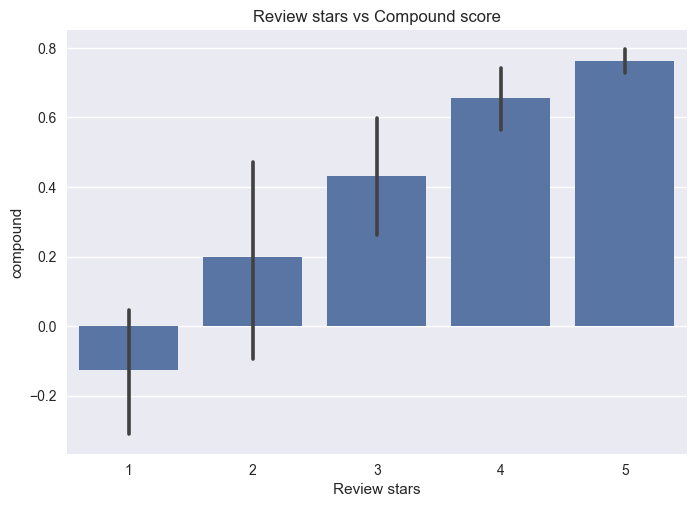

In [63]:
# Review stars vs Compound score

ax=sns.barplot(x='Score',y='compound',data=vaders)
ax.set_xlabel('Review stars')
ax.set_title('Review stars vs Compound score')
plt.show()

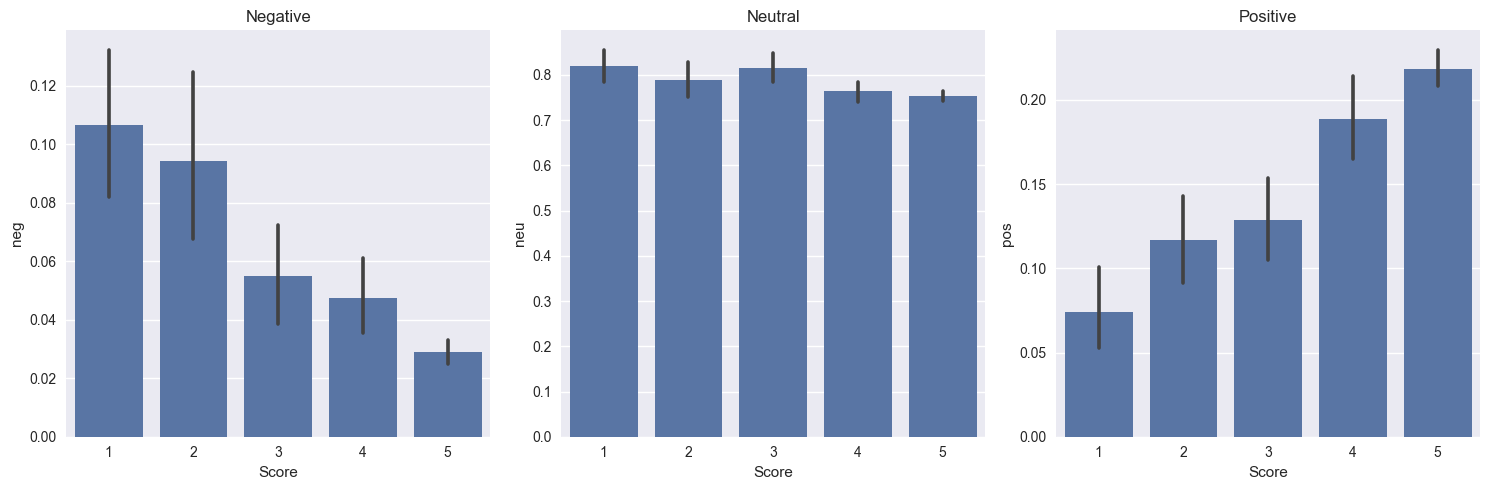

In [65]:
#Neg,Neu,Pos scores vs Review stars

fig, ax=plt.subplots(1,3, figsize=(15,5))

sns.barplot(data=vaders,x='Score',y='neg',ax=ax[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=ax[1])
sns.barplot(data=vaders,x='Score',y='pos',ax=ax[2])

ax[0].set_title('Negative')
ax[1].set_title('Neutral')
ax[2].set_title('Positive')

plt.tight_layout()
plt.show()

### From above graphs, we can see that:
On Negative scores graph, As we go to higher review stars, Neg scores decreases.

On Neutral scores graph, Scores remains the same more or less for all stars.

On Positive scores graph, As we go higher review stars, Positive scores go higher.


#### These results does coincides with our assumptions proving that Overall, Vader Sentiment analysis is valuable and reliable.